In [34]:
import requests
from dataclasses import dataclass
from dotenv import load_dotenv
from IPython.display import display, Image
import os 

In [ ]:
weather_api_key = os.getenv('WEATHER_API_KEY')
load_dotenv(override=True)

In [ ]:
print(weather_api_key)

In [ ]:
@dataclass
class ForecastDay:
    date: str
    condition: str
    min_temp_c: float
    max_temp_c: float

    def __str__(self) -> str:
        return (
            f"{self.date}: {self.condition}, "
            f"min {self.min_temp_c}°C, max {self.max_temp_c}°C"
        )


def get_weather(city: str, days: int = 1) -> list[ForecastDay]:
    """Get weather forecast for city. Returns list of ForecastDay."""
    url = "https://api.weatherapi.com/v1/forecast.json"
    params = {
        "key": weather_api_key,
        "q": city,
        "days": days,
        "aqi": "no",
        "alerts": "no",
    }

    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()

    print(f"Weather forecast for {data['location']['name']}")

    forecast_days = []
    for day in data["forecast"]["forecastday"]:
        fd = ForecastDay(
            date=day["date"],
            condition=day["day"]["condition"]["text"],
            min_temp_c=day["day"]["mintemp_c"],
            max_temp_c=day["day"]["maxtemp_c"],
        )
        forecast_days.append(fd)
        print(fd)

    return forecast_days


In [ ]:

weather = get_weather("Tel Aviv", 5)
print(weather)



In [35]:
def get_book(my_query: str, limit: int = 5) -> None:
    """Get book from Google Books API: https://openlibrary.org/developers/api"""


    url = "https://openlibrary.org/search.json"
    params = {
        "q": my_query,
        "limit": limit,
    }

    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()

    print(data)

    for book in data["docs"]:
        title = book.get("title")
        author = ", ".join(book.get("author_name", []))
        year = book.get("first_publish_year")

        # ISBN: use 'isbn' list if present, else parse from 'ia' (e.g. "isbn_9783257236927" -> 9783257236927)
        isbns = book.get("isbn")
        if not isbns and "ia" in book:
            isbns = [s[5:] for s in book["ia"] if isinstance(s, str) and s.startswith("isbn_")]
        isbn_str = ", ".join(isbns) if isbns else "—"

        print(f"{title} — {author} ({year}) ISBN: {isbn_str}")



    

In [42]:
res = get_book("Dan Brown")



{'numFound': 1614, 'start': 0, 'numFoundExact': True, 'num_found': 1614, 'documentation_url': 'https://openlibrary.org/dev/docs/api/search', 'q': 'Dan Brown', 'offset': None, 'docs': [{'author_key': ['OL39307A'], 'author_name': ['Dan Brown'], 'cover_edition_key': 'OL23740956M', 'cover_i': 8373389, 'ebook_access': 'borrowable', 'edition_count': 120, 'first_publish_year': 2009, 'has_fulltext': True, 'ia': ['isbn_9789722524889', 'elsmbolperdut0000danb', 'isbn_9789955132431', 'utrachennyisimvo0000brow_v3z9', 'osimboloperdido0000brow_y0y4', 'lesymboleperdu0000brow', 'osimboloperdido0000brow', 'utrachennyisimvo0000brow', 'elsimboloperdido0000brow_l6f4', 'lostsymbol0000unse', 'dasverlorenesymb0000brow', 'zaginionysymbol0000brow', 'azelveszettjelke0000brow', 'ilsimboloperduto0000brow', 'dasverlorenesymb0000brow_k1q2', 'hetverlorensymbo0000brow', 'elsimboloperdido0000brow', 'lesymboleperduro0000brow_c4m2', 'dalostasimbola0000brow', 'utrachennysimvol0000brow', 'lesymboleperduro0000brow', 'lostsy

In [37]:
def get_book_cover_image(isbn: str) -> str:
    """Get book cover image from Google Books API:"""

    url = f"https://covers.openlibrary.org/b/isbn/{isbn}-L.jpg"

    response = requests.get(url)

    # this function return image . 
    # display this image if status ok
    if response.status_code == 200:
        display(Image(response.content))








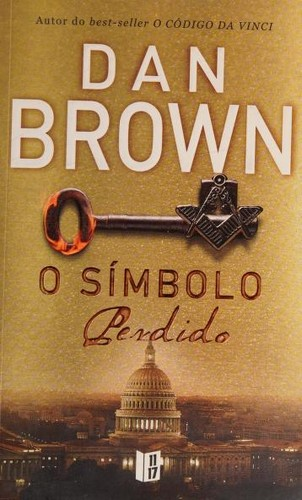

In [43]:
get_book_cover_image("9789722524889")